[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tretiak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tretiak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Without filter extreme 43418
With filter extreme 43414
Topic: 0 
Words: 0.015*"protein" + 0.013*"cell" + 0.011*"mutation" + 0.009*"drug" + 0.008*"mutant" + 0.006*"inhibitor" + 0.005*"enzyme" + 0.005*"binding" + 0.004*"structure" + 0.004*"inhibition" + 0.003*"transcription" + 0.003*"site" + 0.003*"synthesis" + 0.003*"cell_wall" + 0.003*"DNA" + 0.003*"albicans" + 0.003*"interaction" + 0.003*"membrane" + 0.003*"domain" + 0.003*"MRSA" + 0.003*"aureus" + 0.003*"stress" + 0.003*"vancomycin" + 0.003*"Staphylococcus_aureus" + 0.003*"vitro" + 0.003*"transporter" + 0.003*"biosynthesis" + 0.002*"RNA" + 0.002*"substrate" + 0.002*"acid"


Topic: 1 
Words: 0.018*"plasmid" + 0.010*"bacteria" + 0.009*"sequence" + 0.008*"transfer" + 0.008*"DNA" + 0.007*"environment" + 0.006*"ARGs" + 0.005*"tetracycline" + 0.005*"genome" + 0.005*"virulence" + 0.005*"coli" + 0.004*"gene_transfer" + 0.004*"dissemination" + 0.004*"spread" + 0.004*"Escherichia_coli" + 0.004*"host" + 0.004*"conjugation" + 0.003*"pathogen" + 

c:\Users\tretiak\Anaconda3\Anaconda3.0\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


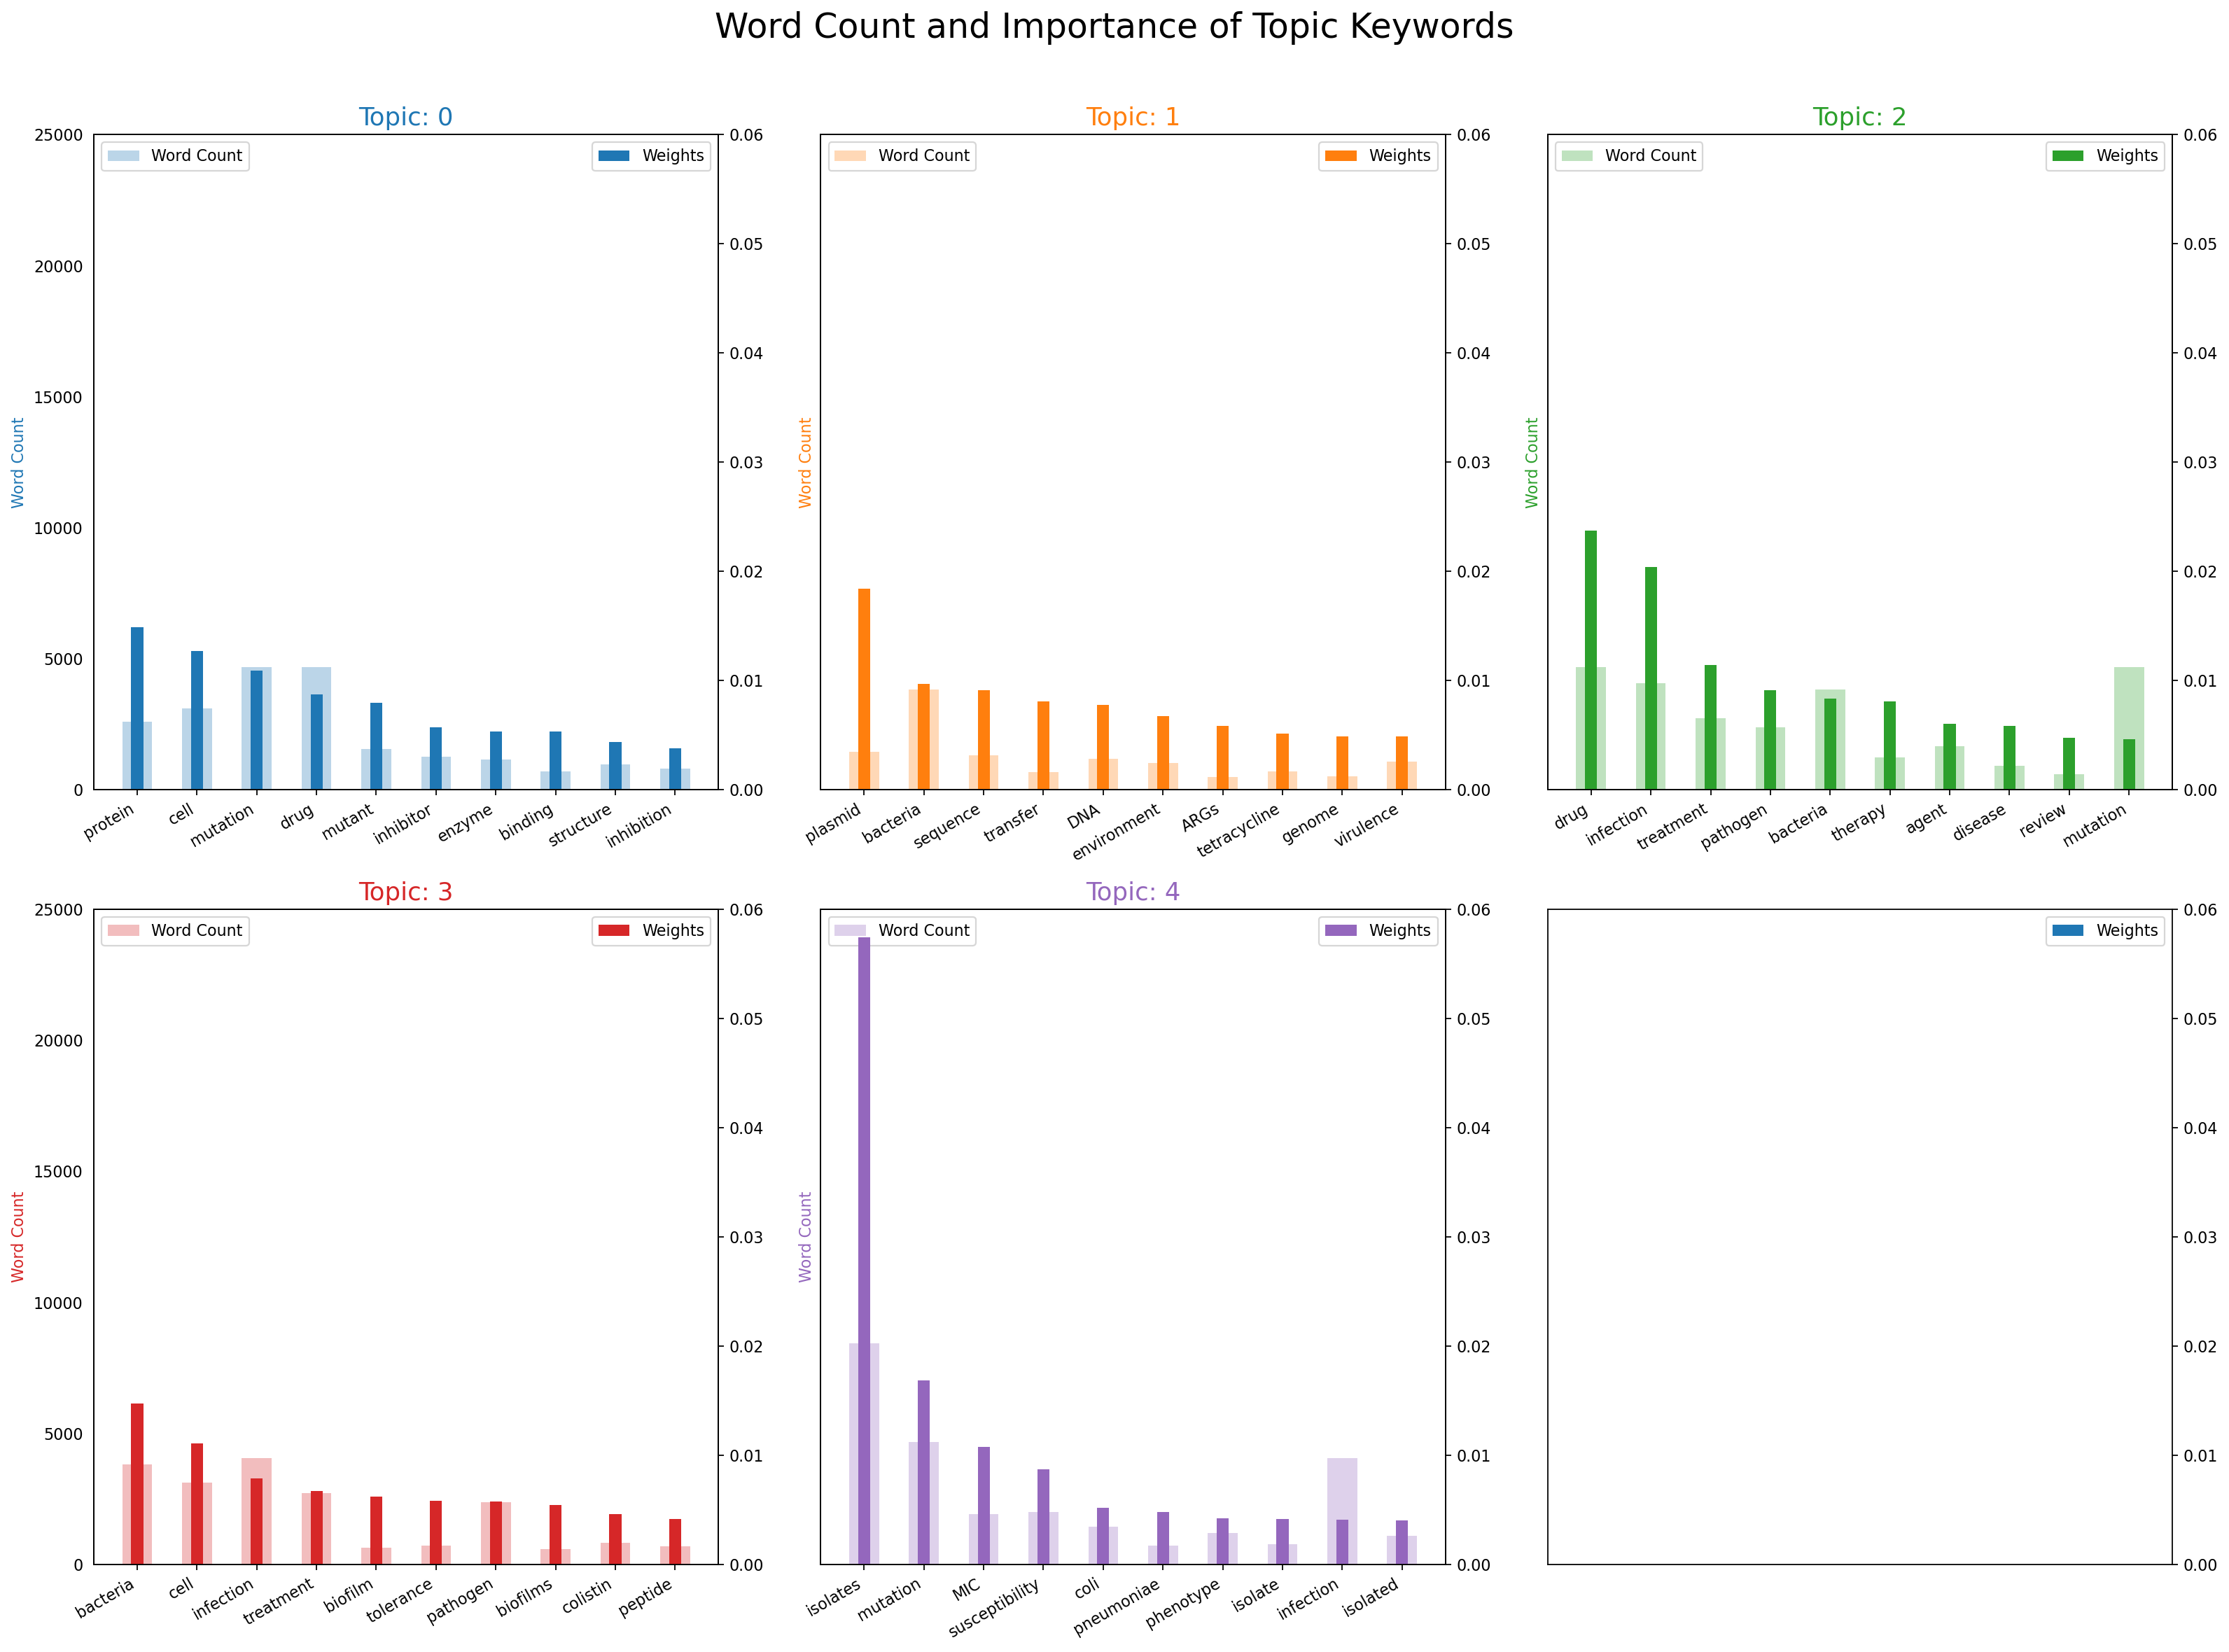

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from textblob import TextBlob
def pos_tag(text):
    try:
        return TextBlob(text).tags
    except:
        return None
def get_adjectives(text):    
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if (tag == "NN" or tag == "NNS" or tag == "NNP" or tag == "NNPS" or tag == "RB" or tag == "RBR" or tag == "RBS" or tag == "RP" or tag == "VB" or tag == "VBD" or tag == "VBG" or tag == "VBN" or tag == "VBP" or tag == "VBZ" or tag == "FW" )]
import matplotlib.pyplot as plt

from socket import SocketIO
import pandas as pd
import numpy as np

review_datasets = pd.read_excel(r'C:\Users\tretiak\Desktop\Topic_modeling\Articles_with_topics_6.0.xlsx')
reviews_datasets1 = pd.DataFrame(review_datasets, columns=['Articles'])
reviews_datasets2=reviews_datasets1.iloc [0:8000]
reviews_datasets4 = pd.DataFrame(review_datasets, columns=['Articles'])
reviews_datasets=reviews_datasets2[~reviews_datasets1.Articles.str.contains('None')]
reviews_datasets.head()
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import string
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora
import gensim.corpora as corpora
from nltk.stem import WordNetLemmatizer
from nltk.stem import porter
stop_words=set(nltk.corpus.stopwords.words('english'))
new_stopwords = ["Background", "Main body", "Conclusion", "Methodology", "Methods", "Results", "Conclusions", "also", "Aim","Materials", "Aims", "Objective", "Design", "Interpretation", "Objectives", "Context"]
new_stopwords.extend(['study',"bla",'activity','found','two','different','identified','expression','including','clinical','showed','patient','associated','one','result','using','may','increased','presence','used','effect','among','development','level','new','analysis','observed','target','novel','However','potential','concentration','system','role','specie','method','compound','important','respectively','well','increase','due','three','high','detected','show','combination','revealed','change','rate','involved','type','common','model','addition','several','growth','data','present','within','multiple','major','class','known','tested','demonstrated','group','compared','region','factor','complex','response','determined','production','effective','strategy','control','investigated','approach','specific','reduced','various','function','many','responsible', 'ability','four','significant','similar','related','variant','profile','case','total','pathway','sensitive','studied','report','selection','performed','suggesting','higher','understanding','shown','first','substitution','active','via','selected','increasing','caused','reported','number','test','element','finding','time','highly' ])

#print(new_stopwords)
exclude = set(string.punctuation)

def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod
def alphabet(ch):
    return ch.replace("α","alpha").replace("MICs","MIC").replace("β","beta").replace("γ","gamma").replace("δ","delta").replace("ε","epsilon").replace("ζ","zeta").replace("η","eta").replace("θ","theta").replace("ι","iota").replace("κ","kappa").replace("λ","lambda").replace("μ","mu").replace("ν","nu").replace("ξ","xi").replace("ο","omicron").replace("π","pi").replace("ρ","rho").replace("σ","sigma").replace("τ","tau").replace("υ","upsilon").replace("φ","phi").replace("χ","chi").replace("ψ","psi").replace("ω","omega")


def clean_text(headline):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(headline)
    tokens=" ".join([le.lemmatize(i) for i in word_tokens if (( i.lower() not in stop_words) and ( not  i.isdigit()) and (len(i)>1) and ( le.lemmatize(i) not in stop_words) ) ])
    cleaned_text1=" ".join(alphabet(ch) for ch in tokens.split() if (ch not in exclude ))
    #cleaned_text3=" ".join(get_adjectives(ch) for ch in tokens.split())
    cleaned_text2=" ".join(ch for ch in cleaned_text1.split(".") )
    #cleaned_text2=[ch for ch in cleaned_text1.split(".")] 
    #cleaned_text3=" ".join(get_adjectives(ch) for ch in cleaned_text2 )
    new_stopwords1=" ".join([le.lemmatize(i) for i in new_stopwords]) 
    stop_words1=" ".join([le.lemmatize(i) for i in stop_words])
    cleaned_text3=" ".join(ch for ch in cleaned_text2.split() if ( ( not  ch.isdigit()) and (len(ch)>1)))
    cleaned_text=" ".join(ch for ch in cleaned_text3.split() if ( ch not in new_stopwords1 ) and ( ch not in stop_words1 ) )
    return cleaned_text
reviews_datasets['cleaned_text']=reviews_datasets['Articles'].apply(clean_text)
reviews_datasets['words'] = reviews_datasets['cleaned_text'].apply(get_adjectives)
#doc_clean1 = " ".join([clean_text(doc).split() for doc in reviews_datasets['Articles']] )
#doc_clean = [clean_text(doc).split() for doc in doc_clean1]   
#doc_clean1 = [clean_text(doc).split() for doc in reviews_datasets['Articles']] 
#doc_clean = [doc for doc in reviews_datasets['Articles']]  
doc_clean=[]
for doc in reviews_datasets['cleaned_text']:
    doc_clean.append(get_adjectives(doc))
    #doc_clean.append(doc_clean1)
   

bigram_mod = bigrams(doc_clean)
bigram = [bigram_mod[review] for review in doc_clean ]
#bigram=[get_adjectives(words) for words in bigram1]
#creating LDA model
id2word = corpora.Dictionary(bigram)
print("Without filter extreme",len(id2word))
id2word.filter_extremes(no_below=1, no_above=0.4)
print("With filter extreme",len(id2word))
corpus = [id2word.doc2bow(text) for text in bigram]

#creating LDA model
Lda = gensim.models.ldamodel.LdaModel
from gensim.test.utils import datapath
# Create the LDA model and fit it to the training data
ldamodel = Lda(corpus=corpus , id2word=id2word, passes=10, iterations=10, random_state=42, num_topics=5, decay=0.5, offset=1, alpha="auto", eta="auto")
ldamodel.save('lda_train.model')
#printing topics
for idx, topic in ldamodel.print_topics(-1,num_words=30 ):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")


from sklearn.metrics import confusion_matrix
print("==================================================")
# Use the LDA model to make predictions on the test data
#predictions = ldamodel[corpusTest]
#ldamodel.update(corpusTest)
#print("predictions ", predictions)
for idx, topic in ldamodel.print_topics(-1,num_words=30 ):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

# Create the confusion matrix
#cm = confusion_matrix(y_test, predictions)
# get the model's topics in their native ordering...
all_topics = ldamodel.print_topics(num_words=30)
# create an empty list per topic to collect the docs:
docs_per_topic = [[] for _ in all_topics]
# create an empty list per document to collect the topics:
topics_per_document=[[] for i in corpus ]
# create an empty list for collecting dominant topics for documents:
topic_out=[]
weight_out=[]


zero=0
first=0
second=0
third=0
fourth=0
# for every doc...
for doc_id, doc_bow in enumerate(corpus ):
    # get its topics
    doc_topics = ldamodel.get_document_topics(doc_bow)
    # and  for each of its topics
    for topic_id, score in doc_topics:
        # add the topic_id & its score to the each document list
         topics_per_document[doc_id].append((topic_id, score))
         docs_per_topic[topic_id].append((doc_id, score))
for i in topics_per_document:
    #sort topics by their score
    main_topic=sorted(list(i),key=lambda x: x[1], reverse=True)
    #add the dominant one
    topic_out.append(main_topic[0][0])
    weight_out.append(main_topic[0][1])
    if(main_topic[0][0]==0 and main_topic[0][1]>=0.5):
        zero+=1
    if(main_topic[0][0]==1 and main_topic[0][1]>=0.5):
        first+=1
    if(main_topic[0][0]==2 and main_topic[0][1]>=0.5):
        second+=1
    if(main_topic[0][0]==3 and main_topic[0][1]>=0.5):
        third+=1 
    if(main_topic[0][0]==4 and main_topic[0][1]>=0.5):
       fourth+=1




reviews_datasets['Topic'] = topic_out
reviews_datasets['Topic weight'] = weight_out
reviews_datasets['colFromIndex'] = reviews_datasets.index

#reviews_datasets=reviews_datasets.dropna()
writer = pd.ExcelWriter('CompareTopics.0.xlsx')
reviews_datasets.sort_values( by =['Topic','colFromIndex']).to_excel(writer)
writer.save()


topic_zero = reviews_datasets[reviews_datasets['Topic'] == 0]
print('Number of documents with zero topic: ', len(topic_zero))
#topic_zero2=0
#for i in review_datasets:
#if ((review_datasets['Topic'] == 0) and (review_datasets['Topic weight'] >= 0.5)):
   # topic_zero2+=1 
topic_zero1=reviews_datasets['Topic weight'] .where(reviews_datasets['Topic'] == 0)
#topic_zero2=topic_zero1.where(review_datasets['Topic weight'] >= 0.5)
print('Number of documents with zero topic above 0.5: ', zero)
#print(topic_zero1)

topic_first = reviews_datasets[reviews_datasets['Topic'] == 1]
print('Number of documents with first topic: ', len(topic_first))
print('Number of documents with first topic above 0.5: ', first)

topic_second = reviews_datasets[reviews_datasets['Topic'] == 2]
print('Number of documents with second topic: ', len(topic_second))
print('Number of documents with second topic above 0.5: ', second)

topic_third = reviews_datasets[reviews_datasets['Topic'] == 3]
print('Number of documents with third topic: ', len(topic_third))
print('Number of documents with third topic above 0.5: ', third)

topic_fourth = reviews_datasets[reviews_datasets['Topic'] == 4]
print('Number of documents with fourth topic: ', len(topic_fourth))
print('Number of documents with fourth topic above 0.5: ', fourth)
# Compute Perplexity Score
print('nPerplexity Score: ', ldamodel.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=bigram, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('nCoherence Score: ', coherence_lda)


print("Alpha score: ", ldamodel.alpha)
print("Eta score: ", ldamodel.eta)

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, id2word)
vis

from collections import Counter
import matplotlib.colors as mcolors
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in bigram for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
writer = pd.ExcelWriter('WordsCount.xlsx')
df.to_excel(writer)
writer.save()

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 3, figsize=(20,14), sharey=True, dpi=160)
axes[1][2].set_visible(False)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.06); ax.set_ylim(0, 25000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [5]:
# Create the confusion matrix
#cm = confusion_matrix(y_test, predictions)
# get the model's topics in their native ordering...
all_topics = ldamodel.print_topics(num_words=30)
# create an empty list per topic to collect the docs:
docs_per_topic = [[] for _ in all_topics]
# create an empty list per document to collect the topics:
topics_per_document=[[] for i in corpus ]
# create an empty list for collecting dominant topics for documents:
topic_out=[]
weight_out=[]

# for every doc...
for doc_id, doc_bow in enumerate(corpus ):
    # get its topics
    doc_topics = ldamodel.get_document_topics(doc_bow)
    # and  for each of its topics
    for topic_id, score in doc_topics:
        # add the topic_id & its score to the each document list
         topics_per_document[doc_id].append((topic_id, score))
         docs_per_topic[topic_id].append((doc_id, score))
for i in topics_per_document:
    #sort topics by their score
    main_topic=sorted(list(i),key=lambda x: x[1], reverse=True)
    print(main_topic)
    #add the dominant one
    if (main_topic[0][0]!=1):
         
        topic_out.append(main_topic[0][0])
        weight_out.append(main_topic[0][1])
    else:
        try:
            topic_out.append(main_topic[1][0])
            weight_out.append(main_topic[1][1])
        except:
            topic_out.append("None")
            weight_out.append("None")
 




reviews_datasets['Topic'] = topic_out
reviews_datasets['Topic weight'] = weight_out
reviews_datasets['colFromIndex'] = reviews_datasets.index

#reviews_datasets=reviews_datasets.dropna()
writer = pd.ExcelWriter('Updated.xlsx')
reviews_datasets.sort_values( by =['Topic','colFromIndex']).to_excel(writer)
writer.save()

for idx, topic in ldamodel.print_topics(-1,num_words=30 ):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

[(2, 0.98462623)]
[(2, 0.6657259), (4, 0.1911944), (3, 0.099309966), (1, 0.039404538)]
[(2, 0.9842387)]
[(2, 0.524025), (3, 0.46562597)]
[(1, 0.45481274), (2, 0.2749053), (0, 0.25503686), (3, 0.011903968)]
[(2, 0.8074793), (0, 0.1866659)]
[(2, 0.47497308), (0, 0.315718), (1, 0.14177305), (3, 0.061898068)]
[(1, 0.67754525), (2, 0.31514347)]
[(2, 0.83051336), (3, 0.09078455), (1, 0.0725736)]
[(2, 0.5007215), (4, 0.22875148), (1, 0.1578274), (3, 0.110168174)]
[(2, 0.5580283), (4, 0.3691317), (3, 0.06768514)]
[(2, 0.64059985), (3, 0.35232013)]
[(3, 0.77734977), (2, 0.21016113)]
[(2, 0.95047665), (1, 0.03849038)]
[(3, 0.6348925), (2, 0.3212756), (4, 0.036909673)]
[(2, 0.9621987), (1, 0.02495908)]
[(2, 0.7114412), (4, 0.26054448), (0, 0.011913878)]
[(2, 0.73974854), (1, 0.25205854)]
[(2, 0.7971855), (4, 0.124106035), (3, 0.07391101)]
[(2, 0.9809756)]
[(2, 0.78827167), (1, 0.19619341)]
[(2, 0.57150835), (3, 0.2812174), (0, 0.14130992)]
[(2, 0.99112886)]
[(2, 0.7422017), (0, 0.24708618)]
[(2, 

In [6]:
#printing topics
for idx, topic in ldamodel.print_topics(-1,num_words=30 ):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

# get the model's topics in their native ordering...
all_topics = ldamodel.print_topics(num_words=30)
# create an empty list per topic to collect the docs:
docs_per_topic = [[] for _ in all_topics]
# create an empty list per document to collect the topics:
topics_per_document=[[] for i in corpus ]
# create an empty list for collecting dominant topics for documents:
topic_out=[]
weight_out=[]
# for every doc...
for doc_id, doc_bow in enumerate(corpus ):
    # get its topics
    doc_topics = ldamodel.get_document_topics(doc_bow)
    # and  for each of its topics
    for topic_id, score in doc_topics:
        # add the topic_id & its score to the each document list
         topics_per_document[doc_id].append((topic_id, score))
         docs_per_topic[topic_id].append((doc_id, score))#
zero=[]
first=[]
second=[]
third=[]
fourth=[]
for i in topics_per_document:
    #sort topics by their score
    z=0
    f=0
    s=0
    th=0
    fo=0
    main_topic=list(i)
    for t in main_topic:
        if (t[0]==0): 
            zero.append(t[1])
            z+=1
        if (t[0]==1): 
            first.append(t[1])
            f+=1
        if (t[0]==2): 
            second.append(t[1])
            s+=1
        if (t[0]==3): 
            third.append(t[1])
            th+=1
        if (t[0]==4): 
            fourth.append(t[1])
            fo+=1
    if (z==0): zero.append(" ")
    if (f==0): first.append(" ")
    if (s==0): second.append(" ")
    if (th==0): third.append(" ")
    if (fo==0): fourth.append(" ")
    #add the dominant one
    topic_out.append(list(main_topic))
    weight_out.append(main_topic[0][1])
   
#print(zero)
reviews_datasets.head()
reviews_datasets['Topic'] = topic_out
reviews_datasets['Topic 0'] = zero
reviews_datasets['Topic 1'] = first
reviews_datasets['Topic 2'] = second
reviews_datasets['Topic 3'] = third
reviews_datasets['Topic 4'] = fourth
reviews_datasets['colFromIndex'] = reviews_datasets.index
reviews_datasets=reviews_datasets.dropna()
writer = pd.ExcelWriter('Document_Topic_Matrix2.xlsx')
reviews_datasets.head()

reviews_datasets.to_excel(writer)
writer.save()

Topic: 0 
Words: 0.015*"protein" + 0.013*"cell" + 0.011*"mutation" + 0.009*"drug" + 0.008*"mutant" + 0.006*"inhibitor" + 0.005*"enzyme" + 0.005*"binding" + 0.004*"structure" + 0.004*"inhibition" + 0.003*"transcription" + 0.003*"site" + 0.003*"synthesis" + 0.003*"cell_wall" + 0.003*"DNA" + 0.003*"albicans" + 0.003*"interaction" + 0.003*"membrane" + 0.003*"domain" + 0.003*"MRSA" + 0.003*"aureus" + 0.003*"stress" + 0.003*"vancomycin" + 0.003*"Staphylococcus_aureus" + 0.003*"vitro" + 0.003*"transporter" + 0.003*"biosynthesis" + 0.002*"RNA" + 0.002*"substrate" + 0.002*"acid"


Topic: 1 
Words: 0.018*"plasmid" + 0.010*"bacteria" + 0.009*"sequence" + 0.008*"transfer" + 0.008*"DNA" + 0.007*"environment" + 0.006*"ARGs" + 0.005*"tetracycline" + 0.005*"genome" + 0.005*"virulence" + 0.005*"coli" + 0.004*"gene_transfer" + 0.004*"dissemination" + 0.004*"spread" + 0.004*"Escherichia_coli" + 0.004*"host" + 0.004*"conjugation" + 0.003*"pathogen" + 0.003*"isolated" + 0.003*"transposon" + 0.003*"soil" + 

Bar Chart

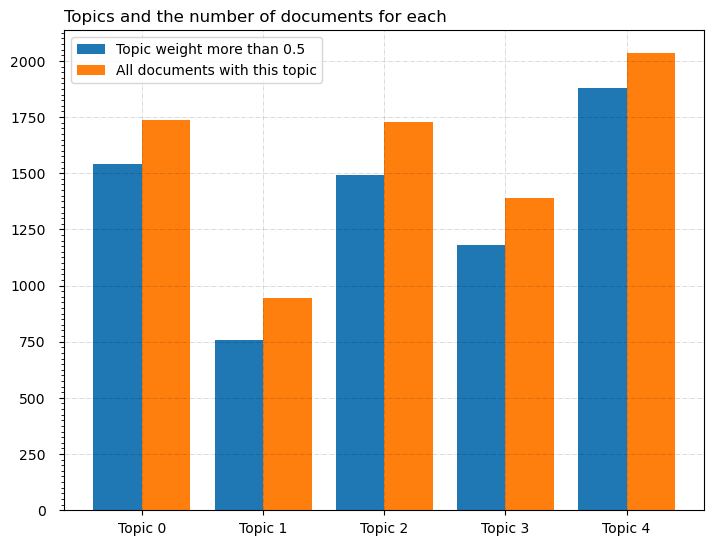

In [10]:
# Plotting tools
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
X = ['Topic 0','Topic 1', 'Topic 2', 'Topic 3', 'Topic 4']
X_axis = np.arange(len(X))
students = [zero,first,second,third,fourth]
length=[len(topic_zero),len(topic_first),len(topic_second),len(topic_third),len(topic_fourth)]
ax.bar(X_axis-0.2,students,0.4, label ='Topic weight more than 0.5')
ax.bar(X_axis+0.2,length,0.4,  label ='All documents with this topic')
ax.grid(b = True, color ='black',linestyle ='-.', linewidth = 0.5, alpha = 0.2)
ax.set_title('Topics and the number of documents for each', loc ='left', )
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
plt.xticks(X_axis, X)
plt.legend()
plt.show()

Wordclouds of topics

c:\Users\tretiak\Anaconda3\Anaconda3.0\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\tretiak\Anaconda3\Anaconda3.0\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\tretiak\Anaconda3\Anaconda3.0\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\tretiak\Anaconda3\Anaconda3.0\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength 

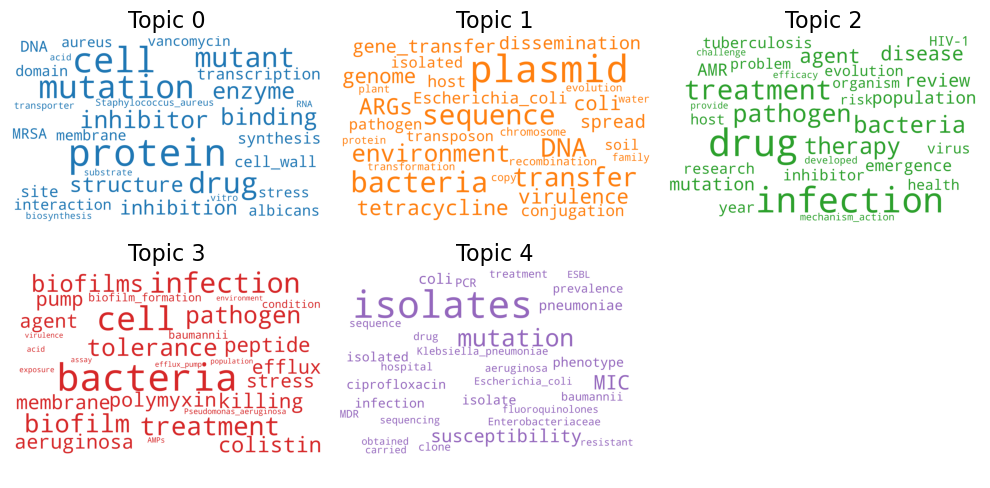

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1500,
                  max_words=30,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1)

topics = ldamodel.show_topics(formatted=False, num_words=30)

fig, axes = plt.subplots(2, 3, figsize=(10,5), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    try:
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')
    except:
        break


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

pyLDAvis

In [ ]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, id2word)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.222067  0.006624       1        1  25.654718
0     -0.135785  0.075435       2        1  22.934538
2      0.010913 -0.180063       3        1  21.409727
3     -0.122331 -0.056106       4        1  17.867983
1      0.025135  0.154110       5        1  12.133035, topic_info=          Term         Freq        Total Category  logprob  loglift
338   isolates  8061.000000  8061.000000  Default  30.0000  30.0000
268    plasmid  1294.000000  1294.000000  Default  29.0000  29.0000
47        drug  4499.000000  4499.000000  Default  28.0000  28.0000
245       cell  2826.000000  2826.000000  Default  27.0000  27.0000
55   infection  3913.000000  3913.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
735   isolated   220.838683  1014.325620   Topic5  -5.7007   0.5847
990     family   170.682022   451.716730   Topic5  -5.9583   1.1360
31    pathogen   222.716141  2173.998761   Topic5  -5.6922  -0.1692
23   evolution   176.838452   698.349861   Topic5  -5.9229   0.7358
175    protein   166.614955  2415.883491   Topic5  -5.9824  -0.5649

[395 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
1773      1  0.032589  ABC_transporter
1773      2  0.928785  ABC_transporter
1773      4  0.027157  ABC_transporter
1773      5  0.016294  ABC_transporter
6980      2  0.036323              AMP
...     ...       ...              ...
386       5  0.037678             year
8438      1  0.003511            yeast
8438      2  0.821569            yeast
8438      3  0.147461            yeast
8438      4  0.031599            yeast

[860 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 4, 2])

Dictionary sizes with filter_extremes

In [ ]:
id2word = corpora.Dictionary(bigram)
print("Without filter extreme",len(id2word))
#id2word1=id2word.filter_extremes(no_below=50, no_above=0.7)
#print(len(id2word1))
corpus = [id2word.doc2bow(text) for text in bigram]
print("Length corpus: ", len(corpus))
#id2word.filter_extremes(no_above=0.99999999)
print("Length id2word: ", len(id2word))

id2word.filter_extremes( no_below=1, no_above=0.95)
print("With filter extreme no_above 0.95",len(id2word))

id2word1 = corpora.Dictionary(bigram)
id2word1.filter_extremes(no_below=1,no_above=0.9)
print("With filter extreme no_above 0.9", len(id2word1))

id2word2 = corpora.Dictionary(bigram)
id2word2.filter_extremes(no_below=1,no_above=0.8)
print("With filter extreme no_above 0.8", len(id2word2))

id2word3 = corpora.Dictionary(bigram)
id2word3.filter_extremes(no_below=1,no_above=0.7)
print("With filter extreme no_above 0.7", len(id2word3))

id2word4 = corpora.Dictionary(bigram)
id2word4.filter_extremes(no_below=1,no_above=0.6)
print("With filter extreme no_above 0.6", len(id2word4))

id2word5 = corpora.Dictionary(bigram)
id2word5.filter_extremes(no_below=1,no_above=0.5)
print("With filter extreme no_above 0.5", len(id2word5))

id2word6 = corpora.Dictionary(bigram)
id2word6.filter_extremes(no_below=1,no_above=0.4)
print("!!!With filter extreme no_above 0.4", len(id2word6))

id2word7 = corpora.Dictionary(bigram)
id2word7.filter_extremes(no_below=1,no_above=0.3)
print("With filter extreme no_above 0.3", len(id2word7))

id2word8 = corpora.Dictionary(bigram)
id2word8.filter_extremes(no_below=1,no_above=0.2)
print("With filter extreme no_above 0.2", len(id2word8))

id2word9 = corpora.Dictionary(bigram)
id2word9.filter_extremes(no_below=1,no_above=0.1)
print("With filter extreme no_above 0.1", len(id2word9))

Without filter extreme 43418
Length corpus:  7837
Length id2word:  43418
With filter extreme no_above 0.95 43418
With filter extreme no_above 0.9 43418
With filter extreme no_above 0.8 43416
With filter extreme no_above 0.7 43416
With filter extreme no_above 0.6 43416
With filter extreme no_above 0.5 43416
!!!With filter extreme no_above 0.4 43414
With filter extreme no_above 0.3 43412
With filter extreme no_above 0.2 43407
With filter extreme no_above 0.1 43395


Probabilities of word appearing in each topic (Word_Topic)

In [ ]:
probs=[]
for words in id2word:
    probs.append(ldamodel.get_term_topics(words, minimum_probability=0))
normalized_probs = []
#probs = ldamodel.get_term_topics()
for words in id2word:
    #print(id2word.get(words) ,ldamodel.get_term_topics(words, minimum_probability=0))
    prob_sum =0
    topic_probs1=[]
    for i, topic_probs in ldamodel.get_term_topics(words, minimum_probability=0):
        #print("!!!" ,topic_probs)
        topic_probs1.append(topic_probs)
        prob_sum +=topic_probs
        #print("Sum", prob_sum)
    normalized_probs.append((id2word.get(words), [(topic/ prob_sum) for topic in topic_probs1]))
df = pd.DataFrame(normalized_probs, columns=['Word', 'Topics '])
df[['Topic 0 ', 'Topic 1 ', 'Topic 2 ', 'Topic 3 ', 'Topic 4 ']] = df['Topics '].apply(pd.Series)
df = df.drop('Topics ', axis=1)
writer = pd.ExcelWriter('Word_Topic.xlsx')
df.to_excel(writer)
writer.save()

Divide into topics unseen documents

In [ ]:
review_datasets = pd.read_excel(r'C:\Users\tretiak\Desktop\Topic_modeling\Articles_with_topics_6.0.xlsx')
reviews_datasets4 = pd.DataFrame(review_datasets, columns=['Articles'])
testData1=reviews_datasets4.iloc [8001:10000]
testData=testData1[~reviews_datasets1.Articles.str.contains('None')]

testData['cleaned_testData']=testData['Articles'].apply(clean_text)
testData['words'] = testData['cleaned_testData'].apply(get_adjectives)
testclean=[]
for doc in testData['cleaned_testData']:
    testclean.append(get_adjectives(doc))
   
bigram_modTest= bigrams(testclean)
bigramTest = [bigram_mod[review] for review in testclean]
#bigram=[get_adjectives(words) for words in bigram1]
#creating LDA model
id2wordTest = corpora.Dictionary(bigramTest)
corpusTest = [id2wordTest.doc2bow(text) for text in bigramTest]
print(len(corpusTest))


from sklearn.metrics import confusion_matrix
print("==================================================")
# Use the LDA model to make predictions on the test data
predictions = ldamodel[corpusTest]
#ldamodel.update(corpusTest)
print("predictions ", predictions)
for idx, topic in ldamodel.print_topics(-1,num_words=30 ):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

docs_per_topicTest = [[] for _ in all_topics]
# create an empty list per document to collect the topics:
topics_per_documentTest=[[] for i in corpusTest ]
# create an empty list for collecting dominant topics for documents:
topic_outTest=[]
weight_outTest=[]      
for doc_id, doc_bow in enumerate(corpusTest):
    # get its topics
    doc_topicsTest = ldamodel.get_document_topics(doc_bow)
    # and  for each of its topics
    for topic_id, score in doc_topicsTest:
        # add the topic_id & its score to the each document list
         topics_per_documentTest[doc_id].append((topic_id, score))
         docs_per_topicTest[topic_id].append((doc_id, score))
for i in topics_per_documentTest:
    #sort topics by their score
    main_topicTest=sorted(list(i),key=lambda x: x[1], reverse=True)
    #add the dominant one
    topic_outTest.append(main_topicTest[0][0])
    weight_outTest.append(main_topicTest[0][1])



testData['TopicTest'] = topic_outTest
testData['Topic weight Test'] = weight_outTest
testData['colFromIndex Test'] = testData.index


writer = pd.ExcelWriter('Unseen.xlsx')
testData.sort_values( by =['TopicTest','colFromIndex Test']).to_excel(writer)
writer.save()

1964
predictions  <gensim.interfaces.TransformedCorpus object at 0x0000021E0F5B1C10>
Topic: 0 
Words: 0.015*"protein" + 0.013*"cell" + 0.011*"mutation" + 0.009*"drug" + 0.008*"mutant" + 0.006*"inhibitor" + 0.005*"enzyme" + 0.005*"binding" + 0.004*"structure" + 0.004*"inhibition" + 0.003*"transcription" + 0.003*"site" + 0.003*"synthesis" + 0.003*"cell_wall" + 0.003*"DNA" + 0.003*"albicans" + 0.003*"interaction" + 0.003*"membrane" + 0.003*"domain" + 0.003*"MRSA" + 0.003*"aureus" + 0.003*"stress" + 0.003*"vancomycin" + 0.003*"Staphylococcus_aureus" + 0.003*"vitro" + 0.003*"transporter" + 0.003*"biosynthesis" + 0.002*"RNA" + 0.002*"substrate" + 0.002*"acid"


Topic: 1 
Words: 0.018*"plasmid" + 0.010*"bacteria" + 0.009*"sequence" + 0.008*"transfer" + 0.008*"DNA" + 0.007*"environment" + 0.006*"ARGs" + 0.005*"tetracycline" + 0.005*"genome" + 0.005*"virulence" + 0.005*"coli" + 0.004*"gene_transfer" + 0.004*"dissemination" + 0.004*"spread" + 0.004*"Escherichia_coli" + 0.004*"host" + 0.004*"conj

Find a topic of unseen document

In [ ]:
unseen_documents1 = [
    "Human respiratory syncytial virus (RSV) is a major cause of respiratory tract infections worldwide. Several novel small-molecule inhibitors of RSV have been identified, but they are still in preclinical or early clinical evaluation. One such inhibitor is a recently discovered triphenol-based molecule, VP-14637 (ViroPharma). Initial experiments suggested that VP-14637 acted early and might be an RSV fusion inhibitor. Here we present studies demonstrating that VP-14637 does not block RSV adsorption but inhibits RSV-induced cell-cell fusion and binds specifically to RSV-infected cells with an affinity corresponding to its inhibitory potency. VP-14637 is capable of specifically interacting with the RSV fusion protein expressed by a T7 vaccinia virus system. RSV variants resistant to VP-14637 were selected; they had mutations localized to two distinct regions of the RSV F protein, heptad repeat 2 (HR2) and the intervening domain between heptad repeat 1 (HR1) and HR2. No mutations arose in HR1, suggesting a mechanism other than direct disruption of the heptad repeat interaction. The F proteins containing the resistance mutations exhibited greatly reduced binding of VP-14637. Despite segregating with the membrane fraction following incubation with intact RSV-infected cells, the compound did not bind to membranes isolated from RSV-infected cells. In addition, binding of VP-14637 was substantially compromised at temperatures of < or =22 degrees C. Therefore, we propose that VP-14637 inhibits RSV through a novel mechanism involving an interaction between the compound and a transient conformation of the RSV F protein."
]
unseen_documents=[get_adjectives(clean_text(doc)) for doc in unseen_documents1]
#print(unseen_documents)
doc_clean=[]
#for doc in unseen_documents:
 #   doc_clean.append(get_adjectives(doc))
bigram_modTest= bigrams(unseen_documents)
bigramTest = [bigram_mod[review] for review in unseen_documents]
#bigram=[get_adjectives(words) for words in bigram1]
#creating LDA model
#id2wordTest = corpora.Dictionary(bigramTest)
corpusTest = [id2wordTest.doc2bow(text) for text in bigramTest]
#id2word = corpora.Dictionary(bigramTest)
#unseen_vectors = [id2word.doc2bow(doc) for doc in bigramTest]
#print(corpusTest)
# Predict the topics for the unseen documents
predictions = ldamodel[corpusTest]
for doc_id, doc_bow in enumerate(corpusTest):
    print(ldamodel.get_document_topics(doc_bow))


[(0, 0.3217379), (1, 0.24702203), (2, 0.23745568), (3, 0.050993122), (4, 0.14279124)]


Document topic matrix

In [ ]:
from socket import SocketIO
import pandas as pd
import numpy as np

review_datasets = pd.read_excel(r'C:\Users\tretiak\Desktop\Topic_modeling\Articles_with_topics_6.0.xlsx')
reviews_datasets1 = pd.DataFrame(review_datasets, columns=['Articles'])
reviews_datasets2=reviews_datasets1.iloc [0:8000]
reviews_datasets=reviews_datasets2[~reviews_datasets1.Articles.str.contains('None')]
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import string

import gensim
import logging # This allows for seeing if the model converges. A log file is created.
logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import warnings
warnings.filterwarnings("ignore")
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
from gensim.utils import simple_preprocess
from gensim import corpora
import gensim.corpora as corpora
from gensim.test.utils import common_texts
from nltk.stem import WordNetLemmatizer
from nltk.stem import porter

stop_words=set(nltk.corpus.stopwords.words('english'))
new_stopwords = ["Background", "Main body", "Conclusion", "Methodology", "Methods", "Results", "Conclusions", "also", "Aim","Materials", "Aims", "Objective", "Design", "Interpretation", "Objectives", "Context",""]
exclude = set(string.punctuation)

def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod
def alphabet(ch):
    return ch.replace("α","alpha").replace("β","beta").replace("γ","gamma").replace("δ","delta").replace("ε","epsilon").replace("ζ","zeta").replace("η","eta").replace("θ","theta").replace("ι","iota").replace("κ","kappa").replace("λ","lambda").replace("μ","mu").replace("ν","nu").replace("ξ","xi").replace("ο","omicron").replace("π","pi").replace("ρ","rho").replace("σ","sigma").replace("τ","tau").replace("υ","upsilon").replace("φ","phi").replace("χ","chi").replace("ψ","psi").replace("ω","omega")

def clean_text(headline):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(headline)
    tokens=" ".join([le.lemmatize(i) for i in word_tokens if (( i.lower() not in stop_words) and ( not  i.isdigit()) and (len(i)>1)) ])
    cleaned_text1=" ".join(alphabet(ch) for ch in tokens.split() if (ch not in exclude ))
    cleaned_text2=" ".join(ch for ch in cleaned_text1.split(".") )
    new_stopwords1=" ".join([le.lemmatize(i) for i in new_stopwords]) 
    stop_words1=" ".join([le.lemmatize(i) for i in stop_words])
    cleaned_text3=" ".join(ch for ch in cleaned_text2.split() if ( ( not  ch.isdigit()) and (len(ch)>1)))
    cleaned_text=" ".join(ch for ch in cleaned_text3.split() if ( ch not in new_stopwords1 ) and ( ch not in stop_words1 ) )
    return cleaned_text 
reviews_datasets['cleaned_text']=reviews_datasets['Articles'].apply(clean_text)
reviews_datasets=reviews_datasets.dropna()
doc_clean = [clean_text(doc).split() for doc in reviews_datasets['Articles']]   

bigram_mod = bigrams(doc_clean)
bigram = [bigram_mod[review] for review in doc_clean ]

#creating LDA model

id2word = corpora.Dictionary(bigram)
id2word.compactify()
corpus = [id2word.doc2bow(text) for text in bigram]

#creating LDA model
Lda = gensim.models.ldamodel.LdaModel
from gensim.test.utils import datapath

ldamodel = Lda(corpus=corpus , id2word=id2word, passes=10, iterations=10, random_state=42, num_topics=5, decay=0.5, offset=1, alpha=1, eta="auto")
ldamodel.save('lda_train.model')
#printing topics
for idx, topic in ldamodel.print_topics(-1,num_words=30 ):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

# get the model's topics in their native ordering...
all_topics = ldamodel.print_topics(num_words=30)
# create an empty list per topic to collect the docs:
docs_per_topic = [[] for _ in all_topics]
# create an empty list per document to collect the topics:
topics_per_document=[[] for i in corpus ]
# create an empty list for collecting dominant topics for documents:
topic_out=[]
weight_out=[]
# for every doc...
for doc_id, doc_bow in enumerate(corpus ):
    # get its topics
    doc_topics = ldamodel.get_document_topics(doc_bow)
    # and  for each of its topics
    for topic_id, score in doc_topics:
        # add the topic_id & its score to the each document list
         topics_per_document[doc_id].append((topic_id, score))
         docs_per_topic[topic_id].append((doc_id, score))#
zero=[]
first=[]
second=[]
third=[]
fourth=[]
for i in topics_per_document:
    #sort topics by their score
    z=0
    f=0
    s=0
    th=0
    fo=0
    main_topic=list(i)
    for t in main_topic:
        if (t[0]==0): 
            zero.append(t[1])
            z+=1
        if (t[0]==1): 
            first.append(t[1])
            f+=1
        if (t[0]==2): 
            second.append(t[1])
            s+=1
        if (t[0]==3): 
            third.append(t[1])
            th+=1
        if (t[0]==4): 
            fourth.append(t[1])
            fo+=1
    if (z==0): zero.append(" ")
    if (f==0): first.append(" ")
    if (s==0): second.append(" ")
    if (th==0): third.append(" ")
    if (fo==0): fourth.append(" ")
    #add the dominant one
    topic_out.append(list(main_topic))
    weight_out.append(main_topic[0][1])
   
#print(zero)
reviews_datasets.head()
reviews_datasets['Topic'] = topic_out
reviews_datasets['Topic 0'] = zero
reviews_datasets['Topic 1'] = first
reviews_datasets['Topic 2'] = second
reviews_datasets['Topic 3'] = third
reviews_datasets['Topic 4'] = fourth
reviews_datasets['colFromIndex'] = reviews_datasets.index
reviews_datasets=reviews_datasets.dropna()
writer = pd.ExcelWriter('Document_Topic_Matrix3.xlsx')
reviews_datasets.head()

reviews_datasets.to_excel(writer)
writer.save()

# Compute Perplexity Score
print('nPerplexity Score: ', ldamodel.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=bigram, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('nCoherence Score: ', coherence_lda)


print("Alpha score: ", ldamodel.alpha)
print("Eta score: ", ldamodel.eta)

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, id2word)
vis

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tretiak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tretiak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic: 0 
Words: 0.025*"resistance" + 0.017*"gene" + 0.014*"antibiotic" + 0.009*"mechanism" + 0.009*"plasmid" + 0.006*"mutation" + 0.005*"protein" + 0.004*"sequence" + 0.004*"transfer" + 0.004*"genome" + 0.004*"bacteria" + 0.004*"enzyme" + 0.004*"DNA" + 0.004*"structure" + 0.003*"two" + 0.003*"found" + 0.003*"different" + 0.003*"bacterial" + 0.003*"strain" + 0.003*"element" + 0.003*"study" + 0.003*"identified" + 0.003*"analysis" + 0.003*"environment" + 0.003*"region" + 0.003*"evolution" + 0.002*"system" + 0.002*"complex" + 0.002*"within" + 0.002*"residue"


Topic: 1 
Words: 0.012*"mutant" + 0.012*"cell" + 0.011*"resistance" + 0.008*"mechanism" + 0.007*"protein" + 0.007*"activity" + 0.007*"strain" + 0.006*"expression" + 0.005*"gene" + 0.005*"mutation" + 0.004*"effect" + 0.004*"increased" + 0.004*"inhibitor" + 0.003*"antibiotic" + 0.003*"virus" + 0.003*"level" + 0.003*"peptide" + 0.003*"bacterial" + 0.003*"growth" + 0.003*"membrane" + 0.003*"concentration" + 0.003*"resistant" + 0.003*"co

c:\Users\tretiak\Anaconda3\Anaconda3.0\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.217892 -0.033782       1        1  25.071054
4     -0.061677 -0.078200       2        1  23.288270
1     -0.124489  0.074806       3        1  22.014153
0     -0.057304 -0.131506       4        1  19.464906
2      0.025578  0.168681       5        1  10.161618, topic_info=               Term         Freq        Total Category  logprob  loglift
565        isolates  6974.000000  6974.000000  Default  30.0000  30.0000
115          strain  8149.000000  8149.000000  Default  29.0000  29.0000
34             gene  8316.000000  8316.000000  Default  28.0000  28.0000
2050         mutant  2710.000000  2710.000000  Default  27.0000  27.0000
419            cell  2668.000000  2668.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
593           using   290.535680  1686.052253   Topic5  -5.7841   0.5281
919   antimicrobial   263.704876  2446.525090   Topic5  -5.8810   0.0590
577       potential   230.446363  1407.884373   Topic5  -6.0158   0.4767
1619       observed   225.298949  1486.671941   Topic5  -6.0384   0.3997
720             may   218.539522  1640.120804   Topic5  -6.0688   0.2710

[443 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
10349      5  0.975437      2+
9806       1  0.007265     AMP
9806       2  0.021795     AMP
9806       3  0.973525     AMP
9807       2  0.195471    AMPs
...      ...       ...     ...
311        1  0.169189  within
311        2  0.190337  within
311        3  0.162844  within
311        4  0.433546  within
311        5  0.043355  within

[1013 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 1, 3])

Probability matrix of terms in topics

In [ ]:
k=0
for i in ldamodel.show_topics(formatted=False,num_topics=ldamodel.num_topics,num_words=len(ldamodel.id2word)):
    tot=[]
    total1=0
    print( f"Length Topic {k}: ",  len(i[1]))
    for j in i[1]:
       tot.append(j[1])
       total1+=j[1]
       print(j[0], j[1])
       
    k+=1
    total=total1
    print("================================================================================================")
    
topics_terms=ldamodel.get_topics()
topics_terms_proba = np.apply_along_axis(lambda x: x,1,topics_terms)
# find the right word based on column index
words = [ldamodel.id2word[i] for i in range(topics_terms_proba.shape[1])]

#put everything together
prob_matrix=pd.DataFrame(topics_terms_proba,columns=words)
#prob_matrix = prob_matrix.sort_values(by= ['0', '1', '2', '3','4'], axis=1)
prob_matrix = prob_matrix.sort_values(by=[0], axis=1, ascending=False)
prob_matrix = prob_matrix.iloc[:, :15000]
#prob_matrix=pd.DataFrame(words,columns=topics_terms_proba)
writer = pd.ExcelWriter('Topic_Term_probability.xlsx')
prob_matrix.to_excel(writer)
writer.save()

Length Topic 0:  43414
protein 0.014869055
cell 0.012723001
mutation 0.010919331
drug 0.008738431
mutant 0.008004664
inhibitor 0.0057549584
enzyme 0.0053368323
binding 0.005319667
structure 0.0043657594
inhibition 0.0037989612
transcription 0.0034735329
site 0.0034644858
synthesis 0.0032790878
cell_wall 0.003229023
DNA 0.0031935582
albicans 0.0030816768
interaction 0.003069905
membrane 0.0029474422
domain 0.0029294493
MRSA 0.0028185428
aureus 0.0027918208
stress 0.0027916096
vancomycin 0.0027853244
Staphylococcus_aureus 0.0026890868
vitro 0.0025843538
transporter 0.002583686
biosynthesis 0.0025310665
RNA 0.0024823109
substrate 0.0024470908
acid 0.0024432933
sensitivity 0.0023712742
regulator 0.0022541808
bacteria 0.0022200104
promoter 0.002214284
virus 0.0020580902
required 0.0020518443
phenotype 0.0020441066
transport 0.0020326679
susceptibility 0.0019947276
HCV 0.0019433956
previously 0.0018983348
assay 0.0018971169
deletion 0.0018829207
yeast 0.00187114
induced 0.0018190292
conserve

In [ ]:
# Create the confusion matrix
#cm = confusion_matrix(y_test, predictions)
# get the model's topics in their native ordering...
all_topics = ldamodel.print_topics(num_words=30)
# create an empty list per topic to collect the docs:
docs_per_topic = [[] for _ in all_topics]
# create an empty list per document to collect the topics:
topics_per_document=[[] for i in corpus ]
# create an empty list for collecting dominant topics for documents:
topic_out=[]
weight_out=[]

# for every doc...
for doc_id, doc_bow in enumerate(corpus ):
    # get its topics
    doc_topics = ldamodel.get_document_topics(doc_bow)
    # and  for each of its topics
    for topic_id, score in doc_topics:
        # add the topic_id & its score to the each document list
         topics_per_document[doc_id].append((topic_id, score))
         docs_per_topic[topic_id].append((doc_id, score))
for i in topics_per_document:
    #sort topics by their score
    main_topic=sorted(list(i),key=lambda x: x[1], reverse=True)
    #print(main_topic)
    #add the dominant one
    if main_topic[0][0]!=1:
         
        topic_out.append(main_topic[0][0])
        weight_out.append(main_topic[0][1])
    else:
        try:
            topic_out.append(main_topic[1][0])
            weight_out.append(main_topic[1][1])
        except:
            topic_out.append("None")
            weight_out.append("None")
 




reviews_datasets['Topic'] = topic_out
reviews_datasets['Topic weight'] = weight_out
reviews_datasets['colFromIndex'] = reviews_datasets.index

#reviews_datasets=reviews_datasets.dropna()
writer = pd.ExcelWriter('Updated1.xlsx')
reviews_datasets.sort_values( by =['Topic','colFromIndex']).to_excel(writer)
writer.save()

In [13]:
from gensim import models
from gensim.corpora import Dictionary
from sklearn.metrics.pairwise import cosine_similarity

print("Topics" ,ldamodel.get_topics)

# Obtain the topic distribution for the deleted topic
deleted_topic = ldamodel.show_topics(num_topics=10, num_words=10)[1]
topics= ldamodel.show_topics(num_topics=10, num_words=10)

print("Deleted topic",deleted_topic)
#print(topics)
del topics[1]
remaining_topic=topics
print(remaining_topic)
deleted_topic_distribution1 = ldamodel.get_topic_terms(1, topn=len(id2word))



# Obtain the topic distributions for the remaining topics
remaining_topic_distributions1 = [ldamodel.get_topic_terms(i, topn=len(id2word)) for i in range(5) if (i!=1)]
deleted_topic_distribution = [item for sublist in deleted_topic_distribution1 for item in sublist]
remaining_topic_distributions=[]
for i in remaining_topic_distributions1:
    remaining_topic_distributions2 = [item for sublist in i for item in sublist]
    remaining_topic_distributions.append(remaining_topic_distributions2)
#print(remaining_topic_distributions)

# Calculate the similarity between the deleted topic and the remaining topics
similarities = []
for remaining_topic_distribution in remaining_topic_distributions:
    similarity = cosine_similarity([deleted_topic_distribution], [remaining_topic_distribution])[0][0]
    similarities.append(similarity)

# Assign the documents to the most similar remaining topic
most_similar_topic = remaining_topic[similarities.index(max(similarities))]
print("Most similar topic ",most_similar_topic)
print(similarities)

Topics <bound method LdaModel.get_topics of <gensim.models.ldamodel.LdaModel object at 0x000001DE8DE11AF0>>
Deleted topic (1, '0.018*"plasmid" + 0.010*"bacteria" + 0.009*"sequence" + 0.008*"transfer" + 0.008*"DNA" + 0.007*"environment" + 0.006*"ARGs" + 0.005*"tetracycline" + 0.005*"genome" + 0.005*"virulence"')
[(0, '0.015*"protein" + 0.013*"cell" + 0.011*"mutation" + 0.009*"drug" + 0.008*"mutant" + 0.006*"inhibitor" + 0.005*"enzyme" + 0.005*"binding" + 0.004*"structure" + 0.004*"inhibition"'), (2, '0.024*"drug" + 0.020*"infection" + 0.011*"treatment" + 0.009*"pathogen" + 0.008*"bacteria" + 0.008*"therapy" + 0.006*"agent" + 0.006*"disease" + 0.005*"review" + 0.005*"mutation"'), (3, '0.015*"bacteria" + 0.011*"cell" + 0.008*"infection" + 0.007*"treatment" + 0.006*"biofilm" + 0.006*"tolerance" + 0.006*"pathogen" + 0.005*"biofilms" + 0.005*"colistin" + 0.004*"peptide"'), (4, '0.057*"isolates" + 0.017*"mutation" + 0.011*"MIC" + 0.009*"susceptibility" + 0.005*"coli" + 0.005*"pneumoniae" + 0.

In [17]:
all_similarities=[]
for i in range(5):
    # Obtain the topic distribution for the deleted topic
    deleted_topic = ldamodel.show_topics(num_topics=5, num_words=10)[i]
    topics= ldamodel.show_topics(num_topics=5, num_words=10)
    del topics[i]
    remaining_topic=topics
#print(remaining_topic)
    deleted_topic_distribution1 = ldamodel.get_topic_terms(i, topn=len(id2word))
    #print("Topic distribution ",deleted_topic_distribution1)



# Obtain the topic distributions for the remaining topics
    remaining_topic_distributions1 = [ldamodel.get_topic_terms(k, topn=len(id2word)) for k in range(5) ]
    deleted_topic_distribution = [item for sublist in deleted_topic_distribution1 for item in sublist]
    remaining_topic_distributions=[]
    for j in remaining_topic_distributions1:
        remaining_topic_distributions2 = [item for sublist in j for item in sublist]
        remaining_topic_distributions.append(remaining_topic_distributions2)
#print(remaining_topic_distributions)

# Calculate the similarity between the deleted topic and the remaining topics
    similarities = []
    for remaining_topic_distribution in remaining_topic_distributions:
        similarity = cosine_similarity([deleted_topic_distribution], [remaining_topic_distribution])[0][0]
        similarities.append(similarity) 
    all_similarities.append(similarities)
print(all_similarities)

data = {
  "topic 0": all_similarities[0],
  "topic 1": all_similarities[1],
  "topic 2": all_similarities[2],
  "topic 3": all_similarities[3],
  "topic 4": all_similarities[4],
}
df = pd.DataFrame(data, columns=["topic 0" ,"topic 1","topic 2","topic 3","topic 4"])
#reviews_datasets=reviews_datasets.dropna()
writer = pd.ExcelWriter('Cosine_similarity.xlsx')
df.to_excel(writer)
writer.save()

[[1.0, 0.7730931565524868, 0.7836803230300438, 0.7819896046371078, 0.7818619415108308], [0.7730931565524868, 1.0, 0.7808964504254475, 0.7874647516421198, 0.772058987550316], [0.7836803230300438, 0.7808964504254475, 1.0000000000000002, 0.8071847891002437, 0.7844530369616528], [0.7819896046371078, 0.7874647516421198, 0.8071847891002437, 1.0000000000000002, 0.7886602550560562], [0.7818619415108308, 0.772058987550316, 0.7844530369616528, 0.7886602550560562, 1.0000000000000002]]


In [15]:
all_similarities=[]
for i in range(5):
    # Obtain the topic distribution for the deleted topic
    deleted_topic = ldamodel.get_topics()[i]
    topics= ldamodel.get_topics()
    del topics[i]
    remaining_topic=topics
#print(remaining_topic)
    deleted_topic_distribution1 = ldamodel.get_topic_terms(i, topn=len(id2word))
    print("Topic distribution ",deleted_topic_distribution1)



# Obtain the topic distributions for the remaining topics
    remaining_topic_distributions1 = [ldamodel.get_topic_terms(k, topn=len(id2word)) for k in range(5) ]
    deleted_topic_distribution = [item for sublist in deleted_topic_distribution1 for item in sublist]
    remaining_topic_distributions=[]
    for j in remaining_topic_distributions1:
        remaining_topic_distributions2 = [item for sublist in j for item in sublist]
        remaining_topic_distributions.append(remaining_topic_distributions2)
#print(remaining_topic_distributions)

# Calculate the similarity between the deleted topic and the remaining topics
    similarities = []
    for remaining_topic_distribution in remaining_topic_distributions:
        similarity = cosine_similarity([deleted_topic_distribution], [remaining_topic_distribution])[0][0]
        similarities.append(similarity) 
    all_similarities.append(similarities)
print(all_similarities)

data = {
  "topic 0": all_similarities[0],
  "topic 1": all_similarities[1],
  "topic 2": all_similarities[2],
  "topic 3": all_similarities[3],
  "topic 4": all_similarities[4],
}
df = pd.DataFrame(data, columns=["topic 0" ,"topic 1","topic 2","topic 3","topic 4"])
#reviews_datasets=reviews_datasets.dropna()
writer = pd.ExcelWriter('Cosine_similarity.xlsx')
df.to_excel(writer)
writer.save()

ValueError: cannot delete array elements

Delete topic 4

In [20]:
# Create the confusion matrix
#cm = confusion_matrix(y_test, predictions)
# get the model's topics in their native ordering...
all_topics = ldamodel.print_topics(num_words=30)
# create an empty list per topic to collect the docs:
docs_per_topic = [[] for _ in all_topics]
# create an empty list per document to collect the topics:
topics_per_document=[[] for i in corpus ]
# create an empty list for collecting dominant topics for documents:
topic_out=[]
weight_out=[]

# for every doc...
for doc_id, doc_bow in enumerate(corpus ):
    # get its topics
    doc_topics = ldamodel.get_document_topics(doc_bow)
    # and  for each of its topics
    for topic_id, score in doc_topics:
        # add the topic_id & its score to the each document list
         topics_per_document[doc_id].append((topic_id, score))
         docs_per_topic[topic_id].append((doc_id, score))
without_topic=0
for i in topics_per_document:
    #sort topics by their score
    main_topic=sorted(list(i),key=lambda x: x[1], reverse=True)
    #print(main_topic)
    #add the dominant one
    if main_topic[0][0]!=4:
         
        topic_out.append(main_topic[0][0])
        weight_out.append(main_topic[0][1])
    else:
        try:
            topic_out.append(main_topic[1][0])
            weight_out.append(main_topic[1][1])
        except:
            topic_out.append("None")
            weight_out.append("None")
            without_topic+=1
 



print("Without topic", without_topic)
reviews_datasets['Topic'] = topic_out
reviews_datasets['Topic weight'] = weight_out
reviews_datasets['colFromIndex'] = reviews_datasets.index

#reviews_datasets=reviews_datasets.dropna()
writer = pd.ExcelWriter('Updated_without_4.xlsx')
reviews_datasets.sort_values( by =['Topic','colFromIndex']).to_excel(writer)
writer.save()

Without topic 344


Plotting coherence score according to the number of topics 

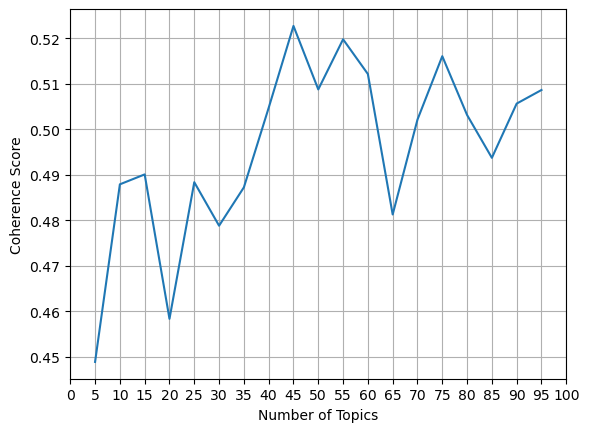

In [8]:
from gensim.models import CoherenceModel
coherence_scores=[]
for num_topics in range(5, 100,5):
    Lda = gensim.models.ldamodel.LdaModel
# Create the LDA model and fit it to the training data
    ldamodel = Lda(corpus=corpus , id2word=id2word, passes=10, iterations=10, random_state=42, num_topics=num_topics, decay=0.5, offset=1, alpha="auto", eta="auto")
    # Compute the coherence score for the current model
    coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=bigram, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    # Append the coherence score to the list
    coherence_scores.append(coherence_score)

# Plot the coherence scores against the number of topics
plt.plot(range(5, 100,5), coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(np.arange(0, 101, 5))
plt.grid()
plt.show()

In [9]:
Lda = gensim.models.ldamodel.LdaModel
# Create the LDA model and fit it to the training data
ldamodel = Lda(corpus=corpus , id2word=id2word, passes=10, iterations=10, random_state=42, num_topics=45, decay=0.5, offset=1, alpha="auto", eta="auto")
    # Create an LDA model with the current number of topics
    
    # Compute the coherence score for the current model
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=bigram, dictionary=id2word, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print('nPerplexity Score: ', ldamodel.log_perplexity(corpus))
print('nCoherence Score: ', coherence_lda)


print("Alpha score: ", ldamodel.alpha)
print("Eta score: ", ldamodel.eta)

for idx, topic in ldamodel.print_topics(-1,num_words=30 ):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")
    
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, id2word)
vis

nPerplexity Score:  -13.956399535700653
nCoherence Score:  0.4489003669205416
Alpha score:  [0.10257391 0.03646595 0.0361378  0.0555196  0.13055223 0.1373717
 0.31958014 0.24706809 0.04302736 0.12574969 0.22331129 0.01565148
 0.06450488 0.05852075 0.09843659 0.03362082 0.05227076 0.05694429
 0.0594093  0.05267798 0.03717667 0.05069278 0.08211357 0.07309365
 0.08526728 0.03792357 0.1557891  0.0215585  0.02973165 0.07115041
 0.06395026 0.06411959 0.08303916 0.06068752 0.03673922 0.11852227
 0.03293076 0.09245785 0.04811314 0.20904715 0.02761894 0.03911854
 0.03308316 0.03146476 0.04695717]
Eta score:  [0.02431194 0.02237087 0.03515498 ... 0.02121318 0.02121318 0.02121318]
Topic: 0 
Words: 0.041*"protein" + 0.034*"binding" + 0.024*"domain" + 0.018*"structure" + 0.018*"HCV" + 0.016*"synthesis" + 0.012*"ribosome" + 0.011*"interaction" + 0.010*"cell_wall" + 0.010*"site" + 0.009*"II" + 0.009*"receptor" + 0.008*"translation" + 0.007*"bind" + 0.007*"kinase" + 0.007*"bacitracin" + 0.007*"cell" +

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
6      0.237757 -0.046472       1        1  8.491007
7      0.214913 -0.105710       2        1  7.348936
39     0.222187 -0.148803       3        1  7.133570
10     0.235490 -0.180850       4        1  6.489848
26     0.194214 -0.143298       5        1  5.191912
9      0.194958  0.241449       6        1  5.175625
35     0.192212 -0.008704       7        1  4.870370
4      0.203935  0.175351       8        1  4.314444
5      0.189894 -0.151002       9        1  4.215099
37     0.138529  0.251204      10        1  3.355611
14     0.159306  0.119215      11        1  3.256812
0      0.121458 -0.175049      12        1  2.976588
12     0.164626  0.026929      13        1  2.819567
32     0.118808  0.204560      14        1  2.652737
22     0.134221  0.096856      15        1  2.652028
24     0.083205 -0.146364      16        1  2.282313
30     0.066739  0.138074      17        1  2.017738
29     0.046353 -0.018450      18        1  1.998129
17     0.047220 -0.139948      19        1  1.792068
31     0.020326  0.016338      20        1  1.669068
38     0.026583 -0.048078      21        1  1.651878
21     0.019829  0.139062      22        1  1.489737
33    -0.014125  0.055402      23        1  1.288319
18    -0.051803  0.010076      24        1  1.184489
13    -0.038708  0.003529      25        1  1.182604
23    -0.025832  0.002004      26        1  1.133036
19    -0.059251 -0.057447      27        1  1.021400
44    -0.074564  0.007157      28        1  0.969164
25    -0.085727  0.105137      29        1  0.929649
3     -0.073098 -0.082621      30        1  0.914870
16    -0.107457 -0.027716      31        1  0.789676
1     -0.128627 -0.032147      32        1  0.777776
34    -0.151411  0.017027      33        1  0.643854
8     -0.142012 -0.031223      34        1  0.636805
20    -0.150540  0.005788      35        1  0.612725
43    -0.137651 -0.028563      36        1  0.585690
41    -0.166008 -0.012186      37        1  0.579548
2     -0.173020  0.008770      38        1  0.569340
15    -0.177292 -0.008875      39        1  0.494887
42    -0.195369 -0.000921      40        1  0.440385
36    -0.197541  0.000380      41        1  0.391538
40    -0.205830 -0.008958      42        1  0.349798
28    -0.206206 -0.008760      43        1  0.342903
27    -0.226236 -0.007093      44        1  0.215040
11    -0.244455 -0.005074      45        1  0.101419, topic_info=            Term         Freq        Total Category  logprob  loglift
47          drug  5060.000000  5060.000000  Default  30.0000  30.0000
338     isolates  9097.000000  9097.000000  Default  29.0000  29.0000
457     mutation  5140.000000  5140.000000  Default  28.0000  28.0000
245         cell  3430.000000  3430.000000  Default  27.0000  27.0000
55     infection  4601.000000  4601.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
16794      vanZ1     0.985046     1.950581  Topic45  -6.3288   6.2105
11687       ompC     2.126875     4.598376  Topic45  -5.5590   6.1226
16032     saline     2.301552     5.474063  Topic45  -5.4801   6.0272
16790  diarrheal     1.718864     4.832094  Topic45  -5.7720   5.8600
1857        fall     1.986754    11.758083  Topic45  -5.6272   5.1156

[2387 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
5036      27  0.992709     -1
10283      5  0.032109     -2
10283     41  0.963285     -2
7223      33  0.966328     -7
11947     28  0.978746     -I
...      ...       ...    ...
2982      15  0.099937  µg/mL
10538     19  0.312519  µg/ml
10538     28  0.677123  µg/ml
16784     45  0.888940   Δagr
9522      45  0.683207   Δcrp

[6183 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 40, 11, 27, 10, 36, 5, 6, 38, 15, 1, 13, 33, 23, 25, 31, 30, 18, 32, 39, 22, 34, 19, 14

Plotting coherence score according to the number of iterations for 45 topics

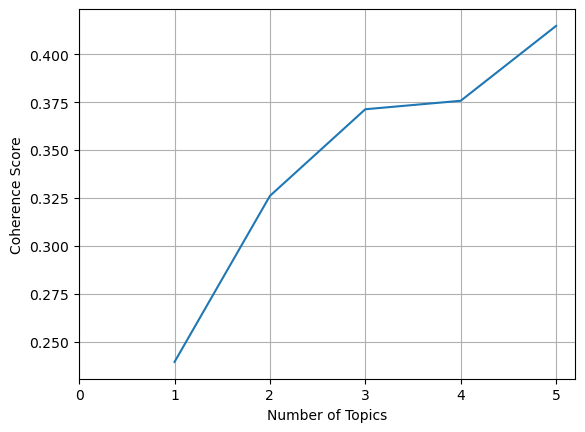

In [10]:
from gensim.models import CoherenceModel
coherence_scores=[]
for num_topics in range(1, 6):
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(corpus=corpus , id2word=id2word, passes=10, iterations=10, random_state=42, num_topics=num_topics, decay=0.5, offset=1, alpha="auto", eta="auto")
    coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=bigram, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    # Append the coherence score to the list
    coherence_scores.append(coherence_score)

# Plot the coherence scores against the number of topics
plt.plot(range(1, 6), coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(np.arange(0, 6, 1))
plt.grid()
plt.show()

Perplexity score according to the number of topics

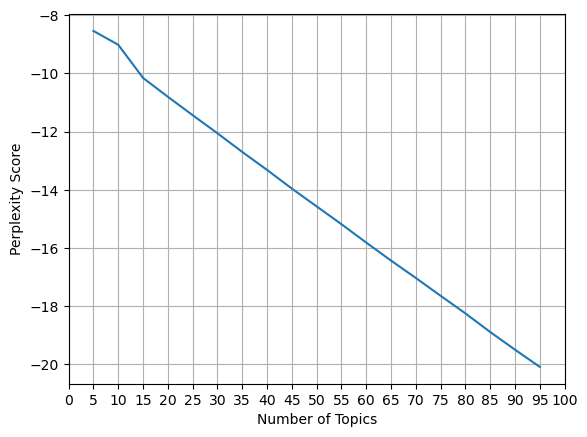

In [12]:
from gensim.models import CoherenceModel
perplexity_scores=[]
for num_topics in range(5, 100,5):
    Lda = gensim.models.ldamodel.LdaModel
# Create the LDA model and fit it to the training data
    ldamodel = Lda(corpus=corpus , id2word=id2word, passes=10, iterations=10, random_state=42, num_topics=num_topics, decay=0.5, offset=1, alpha="auto", eta="auto")
    # Create an LDA model with the current number of topics
    
    # Compute the coherence score for the current model
    perplexity_score = ldamodel.log_perplexity(corpus)
    # Append the coherence score to the list
    perplexity_scores.append(perplexity_score)

# Plot the coherence scores against the number of topics
plt.plot(range(5, 100,5), perplexity_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score')
plt.xticks(np.arange(0, 101, 5))
plt.grid()
plt.show()

Plotting coherence score according to the number of iterations for 5 topics

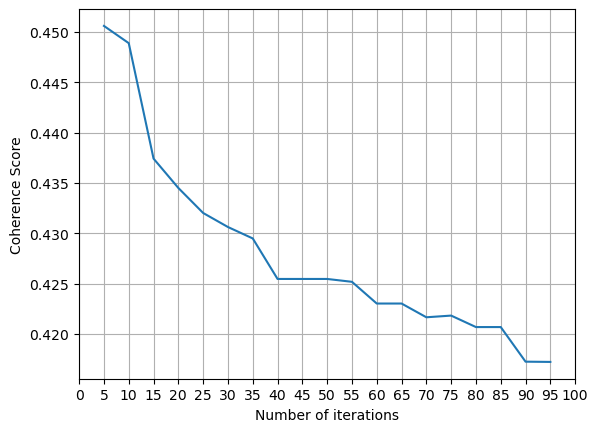

In [11]:
from gensim.models import CoherenceModel
coherence_scores=[]
for iterations in range(5, 100,5):
    Lda = gensim.models.ldamodel.LdaModel
# Create the LDA model and fit it to the training data
    ldamodel = Lda(corpus=corpus , id2word=id2word, passes=10, iterations=iterations, random_state=42, num_topics=5, decay=0.5, offset=1, alpha="auto", eta="auto")
    # Create an LDA model with the current number of topics
    
    # Compute the coherence score for the current model
    coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=bigram, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    # Append the coherence score to the list
    coherence_scores.append(coherence_score)

# Plot the coherence scores against the number of topics
plt.plot(range(5, 100,5), coherence_scores)
plt.xlabel('Number of iterations')
plt.ylabel('Coherence Score')
plt.xticks(np.arange(0, 101, 5))
plt.grid()
plt.show()

Plotting coherence score according to no_above in filter_extremes

[0.5864980042696194, 0.5719044833247743, 0.5292430251030338, 0.5290025772612433, 0.4148228795011494, 0.4148228795011494, 0.4148228795011494, 0.4148228795011494]


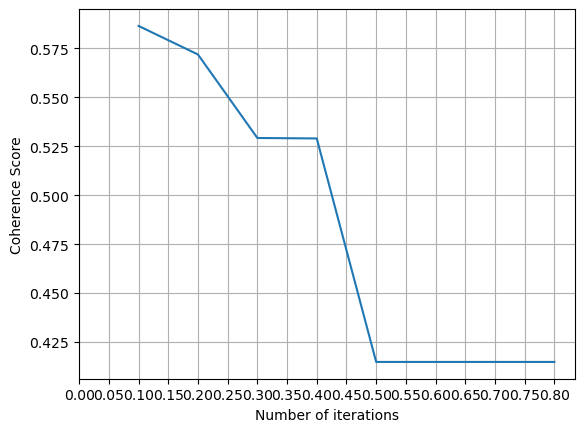

In [ ]:
print(coherence_scores)
x=[float(no_above)/100 for no_above in range(10, 90,10)]
plt.plot(x, coherence_scores)
plt.xlabel('No_above')
plt.ylabel('Coherence Score')
plt.xticks(np.arange(0, 0.81,0.05))
plt.grid()
plt.show()